In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
%config Completer.use_jedi = False

In [2]:
fl='input/tl_2019_51_tract.zip'

In [3]:
vadf=gpd.read_file(fl)

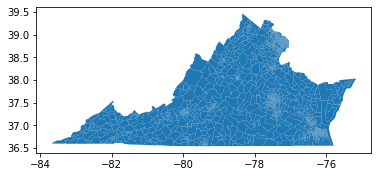

In [4]:
vadf.plot()

In [5]:
vadf=gpd.read_file('/project/biocomplexity/GIS/VA_Gov_Regions/VA_Gov_Regions.zip')

In [6]:
zipfile='input/sentinel_sites_2023-08-03.zip'
ssdf=gpd.read_file(zipfile)
ssdf=ssdf.to_crs({'init':'EPSG:4326'})
ssdf.loc[:,'centroid']=ssdf.geometry.centroid

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.
/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


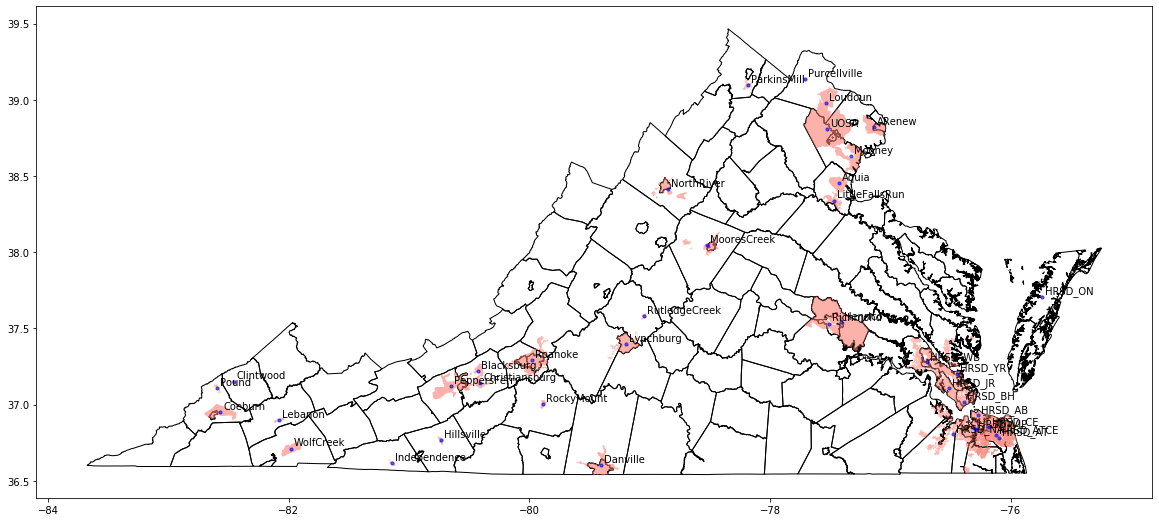

In [12]:
_,ax=plt.subplots(figsize=(20,12))
vadf.plot(facecolor="none",edgecolor='black',ax=ax)
ssdf.geometry.plot(ax=ax,color='salmon',alpha=0.6)
ssdf.centroid.plot(ax=ax,color='blue',markersize=10,alpha=0.6)
for x, y, label in zip(ssdf.geometry.centroid.x, ssdf.geometry.centroid.y, ssdf.sewershed):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


In [22]:
temp=gpd.sjoin(vadf,ssdf,how='inner',op='intersects')

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  """Entry point for launching an IPython kernel.


In [128]:
ww2d_df=temp[['sewershed','wwtp','VDH_Dist','VHASS_Reg']]

In [129]:
ww2d_df=ww2d_df.drop_duplicates()

In [24]:
ss2d_df=pd.read_csv('/project/biocomplexity/COVID-19_commons/data/VDH_wastewater/county_mappings/WWS_to_District_for_agg.csv')

### map from shapefile names to dashboard names

In [58]:
df=pd.read_csv('/project/biocomplexity/COVID-19_commons_tmp//data/opioids_url/Sewershed_PCR_Conc.csv',date_parser=True)
df.sample_collect_date=pd.to_datetime(df.sample_collect_date)
df.test_result_date=pd.to_datetime(df.test_result_date)
df.loc[:,'sewershed']=df.sewershed.replace(ssh_map)
tdf=df[df.sewershed.notna()]

In [52]:
ssh_df=pd.read_csv('/project/biocomplexity/COVID-19_commons/data/VDH_wastewater/county_mappings/ssh_name_mapping.csv')
ssh_map=dict(zip(ssh_df['new_file_name'],ssh_df['dashboard_name']))

In [130]:
map_wwtp_db={}
map_ss_db={}
for w,s in zip(ww2d_df.wwtp.unique(),ww2d_df.sewershed.unique()):
    try:
        name=tdf[(tdf.wwtp_name.str.contains(w))|(tdf.sewershed.str.contains(s))]['sewershed'].unique()[0]
        print(w,'|',s,'->',name)
        map_wwtp_db[w]=name
        map_ss_db[s]=name
    except:
        name=tdf[(tdf.wwtp_name.str.contains(w))|(tdf.sewershed.str.contains(s))]['sewershed'].unique()
        print('NONE',w,'|',s,'->',name)

Roanoke Regional Water Pollution Control | Roanoke -> Roanoke
Pepper's Ferry Regional Wastewater Treat | PeppersFerry -> Pepper's Ferry
Blacksburg-VPI Sanitation Authority | Blacksburg -> Blacksburg
Town of Christiansburg Wastewater Treatm | Christiansburg -> Christiansburg
HRSD: York River | HRSD_YR -> HRSD_YR
HRSD: Williamsburg | HRSD_WB -> Williamsburg
HRSD: James River | HRSD_JR -> HRSD_JR
Little Falls Run Wastewater Treatment Fa | LittleFallsRun -> Little Falls Run
Aquia Wastewater Treatment Plant | Aquia -> Aquia
H.L. Mooney Advanced Water Reclamation F | Mooney -> HL Mooney
Henrico Water Reclamation Facility | Henrico -> Henrico
Town of Lebanon Wastewater Treatment Pla | Lebanon -> Lebanon
Alexandria Renew Enterprises | ARenew -> Alexandria Renew
Moores Creek Advanced Water Resource Rec | MooresCreek -> Moores Creek
Lynchburg Water Resource Recovery Facili | Lynchburg -> Lynchburg
Rutledge Creek Wastewater Treatment Plan | RutledgeCreek -> RutledgeCreek
Richmond Wastewater Treat

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [131]:
ww2d_df=ww2d_df.rename(columns={'sewershed':'shape_sewershed'})
ww2d_df.loc[:,'sewershed']=ww2d_df.shape_sewershed.map(map_ss_db)

In [126]:
ww2d_df.to_csv('csv/mapping_ss_dist_reg.csv',index=None)

In [120]:
for s in ww2d_df.sewershed.unique():
    print(s,ww2d_df[ww2d_df.sewershed==s]['VDH_Dist'].unique())

Roanoke ['Alleghany' 'New River' 'Roanoke City' 'Central Virginia']
Pepper's Ferry ['New River']
Blacksburg ['New River']
Christiansburg ['New River']
HRSD_YR ['Peninsula' 'Three Rivers' 'Hampton']
Williamsburg ['Peninsula' 'Chikahominy']
HRSD_JR ['Peninsula' 'Hampton']
Little Falls Run ['Rappahannock']
Aquia ['Rappahannock' 'Prince William']
HL Mooney ['Rappahannock' 'Prince William' 'Fairfax']
Henrico ['Chikahominy' 'Richmond' 'Henrico' 'Chesterfield']
Lebanon ['Cumberland']
Alexandria Renew ['Alexandria' 'Fairfax' 'Arlington']
Moores Creek ['Thomas Jefferson']
Lynchburg ['Central Virginia']
RutledgeCreek ['Central Virginia']
Richmond ['Richmond' 'Chesterfield' 'Henrico']
Nansemond ['Chesapeake' 'Western Tidewater' 'Portsmouth']
Virginia Initiative Plant ['Chesapeake' 'Portsmouth' 'Norfolk' 'Virginia Beach']
nan []
HRSD_ATCE ['Chesapeake' 'Norfolk' 'Virginia Beach']
HRSD_AT ['Chesapeake' 'Virginia Beach']
Upper Occoquan ['Rappahannock Rapidan' 'Fairfax' 'Prince William' 'Loudoun']
No